# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import spacy
from spacy import displacy
from collections import Counter
from nltk import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Is\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key= os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy'
                                      )
print(f"Total articles about Bitcoin: {bitcoin['totalResults']}")

Total articles about Bitcoin: 8561


In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q='Ethereum', language="en", sort_by="relevancy")
print(f"Total articles about Ethereum: {ethereum['totalResults']}")

Total articles about Ethereum: 2948


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        # append each element of each iteration to the btc_sentiments empty list
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
3,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        # append each element of each iteration to the ethereum_sentiments empty list
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.195090,0.048400,0.003150,0.94845
std,0.288628,0.064743,0.014087,0.06379
min,-0.273200,0.000000,0.000000,0.80100
25%,0.000000,0.000000,0.000000,0.89650
50%,0.000000,0.000000,0.000000,1.00000
75%,0.481000,0.103500,0.000000,1.00000
max,0.755800,0.199000,0.063000,1.00000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.285405,0.062800,0.002400,0.934800
std,0.313684,0.074233,0.010733,0.077756
min,0.000000,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.902500
50%,0.180600,0.036000,0.000000,0.964000
75%,0.530600,0.097500,0.000000,1.000000
max,0.822500,0.221000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean at 0.062800

Q: Which coin had the highest compound score?

A: Ethereum had the higher compund mean at 0.285405

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [51]:

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'chars', '\r\n'}

In [52]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    str_words = ' '.join(str(e) for e in words)
    # Create custom stopwords
    

    # Create a tokenized list of the words
    doc = nlp(str_words)
    doc_words = ' '.join(str(e) for e in doc)
    tok = word_tokenize(doc_words)
    result = [word.lower() for word in tok]
    lemma_words = ' '.join(str(e) for e in result)
    # Lemmatize words into root words
    lemma_result = lemmatizer.lemmatize(lemma_words)
   
    # Convert the words to lowercase
    lower_result = [lemma_result.lower() for word in lemma_result]
    re_words = ' '.join(str(e) for e in lower_result)
    # Remove the stop words
    re_words = word_tokenize(re_words)
    tokens = [word.lower() for word in re_words if word.lower() not in sw.union(sw_addons)]
    
    
    return tokens

In [53]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[big, new, presence, slurping, power, grid, gr..."
3,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."


In [54]:
# Create a new tokens column for Ethereum

ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, bridge, currently, connected, ethereum, ..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, advice, people, new, investing, ..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, musk, picture, alliance, getty, images,..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [57]:
# Generate the Bitcoin N-grams where N=2
btc_grams = ngrams(tokenizer(bitcoin_df["text"].str.cat()), n=2)
Counter(btc_grams).most_common(20)

[(('reuters', 'bitcoin'), 17110),
 (('cryptocurrency', 'bitcoin'), 13688),
 (('illustration', 'taken'), 13688),
 (('oct', 'reuters'), 13688),
 (('bitcoin', 'seen'), 13688),
 (('representation', 'virtual'), 10266),
 (('virtual', 'cryptocurrency'), 10266),
 (('seen', 'picture'), 10266),
 (('picture', 'illustration'), 10266),
 (('taken', 'october'), 10266),
 (('bitcoin', 'hit'), 10266),
 (('kong', 'oct'), 6844),
 (('posted', 'bitcoin'), 6844),
 (('record', 'high'), 6844),
 (('hit', 'high'), 6844),
 (('via', 'getty'), 6844),
 (('getty', 'images'), 6844),
 (('trading', 'higher'), 6844),
 (('similar', 'hoax'), 3422),
 (('hoax', 'earlier'), 3422)]

In [58]:
# Generate the Ethereum N-grams where N=2
eth_grams = ngrams(tokenizer(ethereum_df["text"].str.cat()), n=2)
Counter(eth_grams).most_common(20)

[(('getty', 'images'), 10713),
 (('new', 'york'), 10713),
 (('bitcoin', 'ethereum'), 10713),
 (('rahul', 'rai'), 10713),
 (('elon', 'musk'), 7142),
 (('cryptocurrency', 'exchange'), 7142),
 (('representations', 'cryptocurrencies'), 7142),
 (('ethereum', 'dogecoin'), 7142),
 (('illustration', 'taken'), 7142),
 (('taken', 'june'), 7142),
 (('new', 'bridge'), 3571),
 (('bridge', 'currently'), 3571),
 (('currently', 'connected'), 3571),
 (('connected', 'ethereum'), 3571),
 (('ethereum', 'bridge'), 3571),
 (('bridge', 'cardano'), 3571),
 (('cardano', 'public'), 3571),
 (('public', 'chains'), 3571),
 (('chains', 'come'), 3571),
 (('come', 'future'), 3571)]

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [41]:
# Use token_count to get the top 10 words for Bitcoin
btc_all = tokenizer(bitcoin_df["text"].str.cat())
result_top10_btc = token_count(btc_all, 10)
print(result_top10_btc)

[('bitcoin', 20), ('reuters', 6), ('record', 5), ('wa', 5), ('cryptocurrency', 4), ('picture', 4), ('futuresbased', 4), ('trading', 4), ('launch', 4), ('etf', 4)]


In [60]:
# Use token_count to get the top 10 words for Ethereum
eth_all = tokenizer(ethereum_df["text"].str.cat())

result_top10_eth = token_count(eth_all, 10)
print(result_top10_eth)

[('ethereum', 39281), ('cryptocurrency', 35710), ('bitcoin', 32139), ('new', 17855), ('images', 17855), ('ether', 14284), ('bridge', 10713), ('cryptocurrencies', 10713), ('crypto', 10713), ('getty', 10713)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

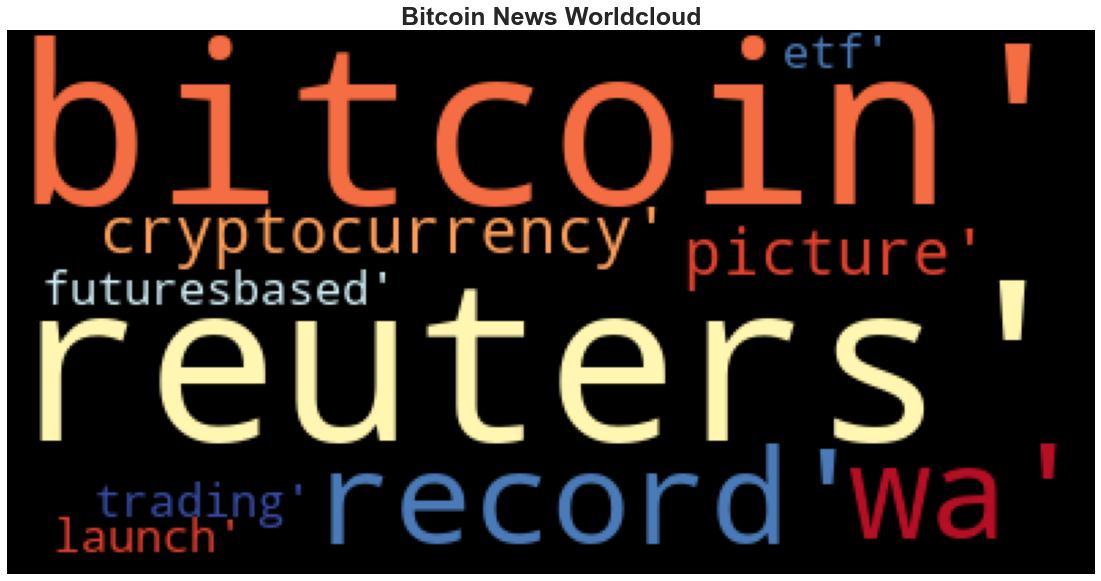

In [71]:
# Generate the Bitcoin word cloud
terms_list = str(result_top10_btc)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 25, "fontweight": "bold"}
plt.title("Bitcoin News Worldcloud", fontdict=fontdict)
plt.show()

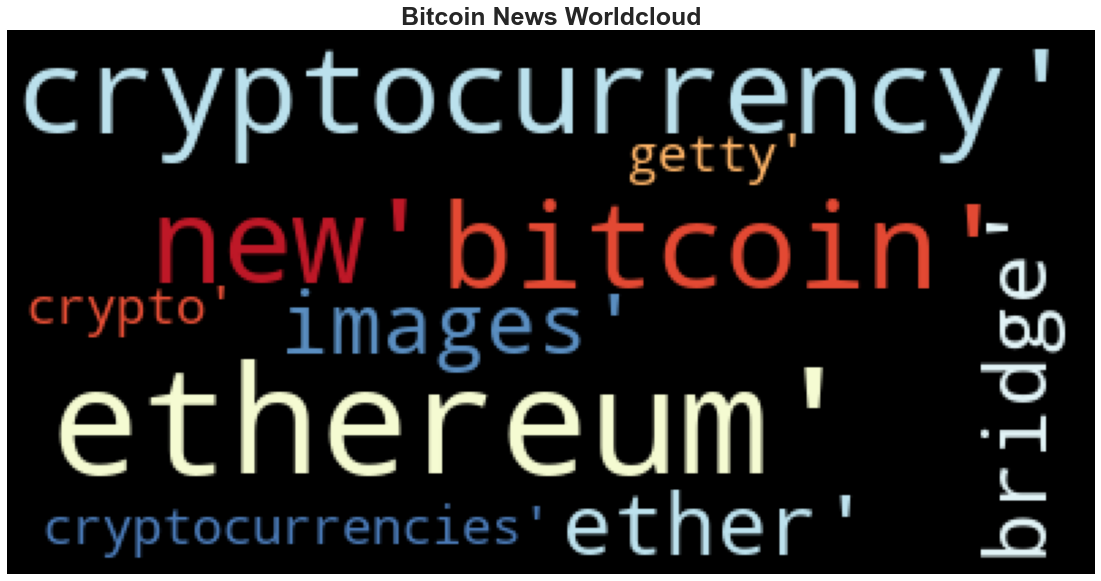

In [72]:
# Generate the Ethereum word cloud
terms_list = str(result_top10_eth)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 25, "fontweight": "bold"}
plt.title("Bitcoin News Worldcloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [61]:
import spacy
from spacy import displacy

In [73]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [74]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [76]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df["text"].str.cat()

In [79]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)
 
doc.user_data["title"] = "Title: Bitcoin NER"

displacy.render(doc, style='ent')


# Add a title to the document
# YOUR CODE HERE!

In [27]:
# Render the visualization
# YOUR CODE HERE!

In [28]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [29]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [30]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [31]:
# Render the visualization
# YOUR CODE HERE!

In [32]:
# List all Entities
# YOUR CODE HERE!

---